<a href="https://colab.research.google.com/github/pkro/tensorflow_cert_training/blob/main/colab_notebooks/01b_a_larger_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## A larger example

We'll get a dataset from [kaggle](https://www.kaggle.com/)

[Description](https://www.kaggle.com/datasets/mirichoi0218/insurance)

Dataset: https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv

### Preparing the dataset

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# history visualizer helper from previous notebook
import pandas as pd
def plot_history(history):
  pd.DataFrame(history.history).plot()
  plt.ylabel("loss")
  plt.xlabel("epochs")

In [3]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


The dependend variable - the one we're trying to predict - is "charges".

The others are the independent variables (= predictors / features / covariates).


In [4]:
# Convert text columns into numbers / one-hot encode categorical text variables

# create a new dataframe with one-hot encoded sex
dummies = pd.get_dummies(insurance['sex'], prefix='sex')
dummies

,sex_female,sex_male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1333,0,1
1334,1,0
1335,1,0
1336,1,0


In [5]:
# Concat the data
insurance = pd.concat([insurance, dummies], axis='columns')
insurance

,age,sex,bmi,children,smoker,region,charges,sex_female,sex_male
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,1,0
1335,18,female,36.850,0,no,southeast,1629.83350,1,0
1336,21,female,25.800,0,no,southwest,2007.94500,1,0


In [6]:
# delete the originial text column
insurance = insurance.drop(['sex'], axis='columns') # create new dataframe (or do it inplace as in the next example)

In [7]:
# this can be done in one go too, here for "smoker" and "region"
# note the double [[]]
# when supplying multiple, pandas automatically adds prefixes based on 
# the original column's name
dummies = pd.get_dummies(insurance[['smoker', 'region']]) # add .copy() if modification of the new dataframe is intended
dummies

,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0,1,0,0,0,1
1,1,0,0,0,1,0
2,1,0,0,0,1,0
3,1,0,0,1,0,0
4,1,0,0,1,0,0
...,...,...,...,...,...,...
1333,1,0,0,1,0,0
1334,1,0,1,0,0,0
1335,1,0,0,0,1,0
1336,1,0,0,0,0,1


In [8]:
# concat
insurance = pd.concat([insurance, dummies], axis="columns")
# and delete old columns
insurance.drop(['smoker', 'region'], axis="columns", inplace=True) # can be done inplace

insurance

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


### Build a regression model

In [9]:

# Create X and y values (features and labels)
features = insurance[insurance.columns.difference(['charges'])]
labels = insurance['charges']

# Split into training and test set
idx_at_80_percent = round(len(insurance) / 100 * 80)
X_train = tf.constant(features[:idx_at_80_percent])
y_train = tf.constant(labels[:idx_at_80_percent])
X_test = tf.constant(features[idx_at_80_percent:])
y_test = tf.constant(labels[idx_at_80_percent:])

# Another (better) way usking scikit-learn; also randomizes the indexes automatically
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, train_size=0.8)
X_train


,age,bmi,children,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male,smoker_no,smoker_yes
110,54,33.630,1,0,1,0,0,0,1,1,0
1199,31,25.800,2,0,0,0,1,1,0,1,0
300,36,27.550,3,1,0,0,0,0,1,1,0
1040,35,28.025,0,0,1,0,0,1,0,0,1
127,52,37.400,0,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1045,43,24.700,2,0,1,0,0,1,0,0,1
629,44,38.950,0,0,1,0,0,1,0,0,1
810,46,30.800,3,0,0,0,1,1,0,1,0
916,43,26.885,0,0,1,0,0,1,0,0,1


In [10]:
tf.random.set_seed(42)
# Create model
insurance_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
], name="insurance_model")

# Compile model
insurance_model.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss=tf.keras.losses.mae,
    metrics=["mae"]
)

# Fit data
# fit converts dataframes automatically
insurance_model.fit(X_train, y_train, epochs=100, verbose=0)

### Evaluate

#### using model.evaluate

In [11]:
# evaluate
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 8188.5625 - mae: 8188.5625


[8188.5625, 8188.5625]

In [12]:
y_train.median(), y_train.mean()

(9296.016525, 12974.057582457008)

The mean average error is 8761, meaning it is on average off by 8761 with its predictions, which is way too high given the average / mean values

#### Using visualization

Digression from course to check how to plot multi-feature dataset predictions (spoiler: just pick one that's reasonably spread out)

In [13]:
# predict
y_pred = insurance_model.predict(X_test)
"...", y_pred[:10]

9/9 [==============================] - 0s 2ms/step


('...', array([[ 8707.839 ],
        [11469.929 ],
        [ 4507.5986],
        [ 6166.7007],
        [ 3269.8838],
        [ 3569.0308],
        [ 5481.3516],
        [ 9972.793 ],
        [16942.943 ],
        [16004.247 ]], dtype=float32))

In [14]:
X_test['bmi']

220     33.700
1221    24.970
526     30.590
125     28.785
663     33.660
         ...  
917     22.895
190     31.570
588     35.910
502     23.210
1326    32.870
Name: bmi, Length: 268, dtype: float64

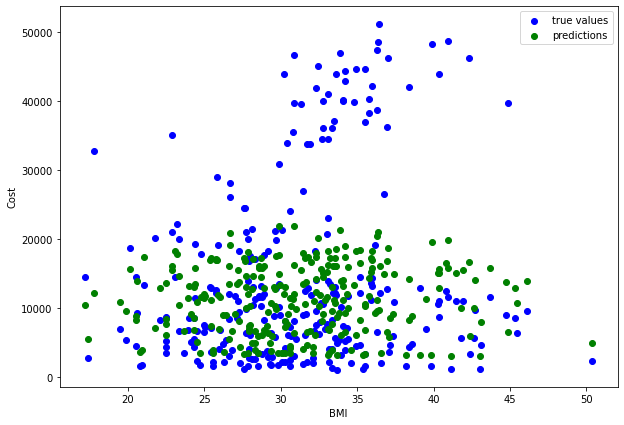

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
# pick just one feature for now to have something to visualize
# accuracy in a 2d plot
# remember, X_test is a pandas dataframe so we pick by column name
bmi = X_test['bmi']

# true values in blue
plt.scatter(bmi, y_test, c="blue", label="true values")
# predictions in green
plt.scatter(bmi, y_pred, c="green", label="predictions")
plt.xlabel('BMI')
plt.ylabel('Cost')
plt.legend()
plt.show()


### Experiment

In [16]:
tf.random.set_seed(42)
# remove 1 layer
insurance_model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(optimizer=tf.keras.optimizers.SGD(), 
                          loss=tf.keras.losses.MAE,
                          metrics=["mae"])
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [17]:
# evaluate again

# reminder of the loss of the previous model
print("insurance_model evaluation: ", insurance_model.evaluate(X_test, y_test))

# show losses of the current model
print("insurance_model_2 evaluation: ", insurance_model_2.evaluate(X_test, y_test))

9/9 [==============================] - 0s 2ms/step - loss: 8188.5625 - mae: 8188.5625
insurance_model evaluation:  [8188.5625, 8188.5625]
9/9 [==============================] - 0s 2ms/step - loss: 8249.3643 - mae: 8249.3643
insurance_model_2 evaluation:  [8249.3642578125, 8249.3642578125]


That's noticably better. Fiddle around in the below cell until we have a better result.

**Note**: if model.evaluate returns `nan`, it can be that the model is too complex to learn anything (e.g. too many layers / neurons)

In [24]:
# result of experiments

tf.random.set_seed(42)

insurance_model_3 = tf.keras.models.Sequential([
    # add a layer
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# change optimizer
insurance_model_3.compile(optimizer=tf.keras.optimizers.Adam(), 
                          loss=tf.keras.losses.MAE,
                          metrics=["mae"])
# more epochs
history_3 = insurance_model_3.fit(X_train, y_train, epochs=150, verbose=0)

print("insurance_model_2 evaluation: ", insurance_model_2.evaluate(X_test, y_test))
print("insurance_model_3 evaluation: ", insurance_model_3.evaluate(X_test, y_test))

9/9 [==============================] - 0s 2ms/step - loss: 8249.3643 - mae: 8249.3643
insurance_model_2 evaluation:  [8249.3642578125, 8249.3642578125]
9/9 [==============================] - 0s 2ms/step - loss: 4134.9482 - mae: 4134.9482
insurance_model_3 evaluation:  [4134.9482421875, 4134.9482421875]


In [19]:
insurance_model_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               1200      
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


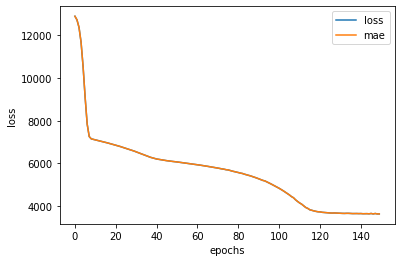

In [25]:
plot_history(history_3)

9/9 [==============================] - 0s 2ms/step - loss: 4134.9482 - mae: 4134.9482
insurance_model_3 evaluation:  [4134.9482421875, 4134.9482421875]
9/9 [==============================] - 0s 2ms/step - loss: 4051.4441 - mae: 4051.4441
insurance_model_4 evaluation:  [4051.444091796875, 4051.444091796875]


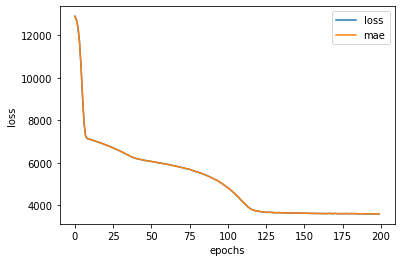

In [38]:
# Try to improve the so far best model insurance_model_3
tf.random.set_seed(42)

insurance_model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# change learning rage
insurance_model_4.compile(optimizer=tf.keras.optimizers.Adam(), 
                          loss=tf.keras.losses.MAE,
                          metrics=["mae"])
# more epochs
history_4 = insurance_model_4.fit(X_train, y_train, epochs=200, verbose=0)

plot_history(history_4)
print("insurance_model_3 evaluation: ", insurance_model_3.evaluate(X_test, y_test))
print("insurance_model_4 evaluation: ", insurance_model_4.evaluate(X_test, y_test))

### EarlyStopping callback

**How long (how many epochs) should you train for?**

Depending on the problem.

Stop training when the model stops improving, visible in the flattened curve in the history.

TensorFlow has a solution: [EarlyStopping Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), which is a tensorflow component that can be added to the model to stop training once it stops improving a certain metric.

Usage:


    early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20)
    #...
    history_4_earlystopping = insurance_model_4.fit(X_train, y_train, epochs=200, verbose=0, callbacks=[early_stopping_callback])

### Preprocesing data (normalization and standardization)

